In [1]:
from Populations import *
import matplotlib.pyplot as plt

In [30]:
class Instance():
    def __init__(self, initialHostPopulationValues, initialPhagePopulationValues, carryingCap, fitnessParameters, lysisQuantities, hostMutMatrix, infectionMatrix, numIters):
        self.hostPopulations = []
        self.phagePopulations = []
        self.carryingCapacity = carryingCap
        self.numIterations = numIters
        
        self.initializePopulations(initialPopulationValues, fitnessParameters, lysisQuantities)

        self.timeValues = np.zeros(numIters + 1)
        self.hostPopulationValues = np.zeros((len(self.hostPopulations), numIters + 1))
        self.hostPopulationValues[:, 0] = [self.hostPopulations[k].populationLevel for k in range(len(self.hostPopulations))]

        self.hostMutationMatrix = hostMutMatrix
        self.phageHostInfectionMatrix = infectionMatrix
        self.completedRun = False

    def initializePopulations(self, initialHostPopVals, initialPhagePopVals, fitnessParams, lysisQuantities):
        for j in range(len(fitnessParams)):
            self.hostPopulations.append(hostPopulation(j, initialHostPopVals[j], fitnessParams[j]))

        hostPopVals = [pop.populationLevel for pop in self.hostPopulations]
        for pop in self.hostPopulations:
            pop.computeGrowthRate(hostPopVals, self.carryingCapacity)
            pop.regenerateTimer()

        for j in range(len(initialPhagePopulationValues)):
            self.phagePopulations.append(phagePopulation(j, initialPhagePopVals[j], lysisQuantities[0], lysisQuantities[1]))

    def runAlgorithm(self):
        for k in range(self.numIterations):
            #Step 1
            (minTimer, virocell, minPopIdx) = self.findMinPopTimer()
    
            #Step 2
            self.timeValues[k + 1] = self.timeValues[k] + minTimer
    
            #Step 3
            if not virocell:
                self.updateHostPopulation(minPopIdx)
            else:
                self.updatePhagePopulation(minPopIdx)
            
            self.hostPopulationValues[:, k + 1] = [self.hostPopulations[k].populationLevel for k in range(len(self.hostPopulations))]
            self.phagePopulationValues[:, k + 1] = [self.phagePopulations[k].populationLevel for k in range(len(self.phagePopulations))]
    
            #Step 4
            self.recomputeGrowthRates()
    
            #Step 5
            self.updateHostTimers(minTimer)
            #self.updatePhageTimers()
    
            #Step 6
            self.regeneratePopTimers()

        self.completedRun = True
    
    def findMinPopTimer(self):
        hostPopTimers = [pop.getTimer() for pop in self.hostPopulations]
        phagePopTimers = [pop.getTimer() for pop in phage.phagePopulations]
        minHostTimer = min(hostPopTimers)
        minPhageTimer = min(phagePopTimers)
        
        minHostPopTimerIdx = hostPopTimers.index(minHostTimer)
        minPhagePopTimerIdx = phagePopTimers.index(minPhageTimer)

        virocell = minHostTimer > minPhageTimer
        if not virocell:
            minTimer = minHostTimer
            minPopTimerIdx = minHostPopTimerIdx
        else:
            minTimer = minPhageTimer
            minPopTimerIdx = minPhagePopTimerIdx
        
        return (minTimer, virocell, minPopTimerIdx)

    def updateHostPopulation(self, minPopIdx):
        #Get the growth rate's sign to see growth or death
        growth_rate = self.hostPopulations[minPopIdx].growthRate
        
        if growth_rate > 0:
            localMutationProbabilities = self.hostMutationMatrix[minPopIdx, :]
            possibilities = [n for n in range(len(self.hostPopulations))]
            #random.choice(what you're choosing from, how many you're choosing, are you replacing, weights)
            spawnChoiceIdx = np.random.choice(possibilities, None, True, localMutationProbabilities)
            self.hostPopulations[spawnChoiceIdx].changeHostPopulation(1)
        elif growth_rate < 0:
            self.hostPopulations[minPopIdx].changeHostPopulation(-1)
        else:
            self.hostPopulations[minPopIdx].changeHostPopulation(0)


    def updatePhagePopulation(self, minPopIdx):
        numCorrespondingVirocells = self.phagePopulations[minPopIdx].populationLevel
        newPhageParticles = self.phagePopulations[minPopIdx].burstSize * numCorrespondingVirocells
        
        totalHostNum = sum([pop.populationLevel for pop in self.hostPopulations])
        
        newInfections = [newPhageParticles * infectionWeight for infectionWeight in self.phageHostInfectionMatrix[minPopIdx, :]]
        totalNewInfections = sum(newInfections)
        self.phagePopulations[minPopIdx] = totalNewInfections

        for j in range(len(self.hostPopulations)):
            self.hostPopulations[j].changePopulation(-newInfections[j])
            #Extinction is extinction: no negative abundances.
    
    def recomputeGrowthRates(self):
        hostPopVals = [pop.populationLevel for pop in self.hostPopulations]
        for pop in self.hostPopulations:
            pop.computeGrowthRate(hostPopVals, self.carryingCapacity)

    def updateHostTimers(self, minPopTimer):
        for pop in self.hostPopulations:
            pop.updateTimer(minPopTimer)

    def updatePhageTimers(self):
        return 0

    def regeneratePopTimers(self):
        for pop in self.hostPopulations:
            pop.regenerateTimer()
    
    def allPopsReportForDuty(self):
        for j in range(len(self.hostPopulations)):
            self.hostPopulations[j].reportPopInfo()

    def displayResultsAsTimecourses(self):
        if (self.completedRun == False):
            print("\nYou need to generate some data first!\n")
        else:
            for j in range(len(self.hostPopulations)):
                plt.plot(self.timeValues, self.hostPopulationValues[j, :])

SyntaxError: expected ':' (731728420.py, line 66)


Information for Population 0
-----------------------------
Population Level: 50
Fitness Parameter: 10
Would-be Exponential Growth Rate: 500
Logistic Growth Rate: 495.0
Timer Value: 0.00021403836895143781

Information for Population 1
-----------------------------
Population Level: 50
Fitness Parameter: 20
Would-be Exponential Growth Rate: 1000
Logistic Growth Rate: 990.0
Timer Value: 0.0010307064137595502

Testing findMinPopTimer()

(0.00021403836895143781, 0, 0)

Testing updateHostPopulation()


Information for Population 0
-----------------------------
Population Level: 51
Fitness Parameter: 10
Would-be Exponential Growth Rate: 510
Logistic Growth Rate: 495.0
Timer Value: 0.00021403836895143781

Information for Population 1
-----------------------------
Population Level: 50
Fitness Parameter: 20
Would-be Exponential Growth Rate: 1000
Logistic Growth Rate: 990.0
Timer Value: 0.0010307064137595502

Testing runAlgorithm()


Information for Population 0
-----------------------------
Pop

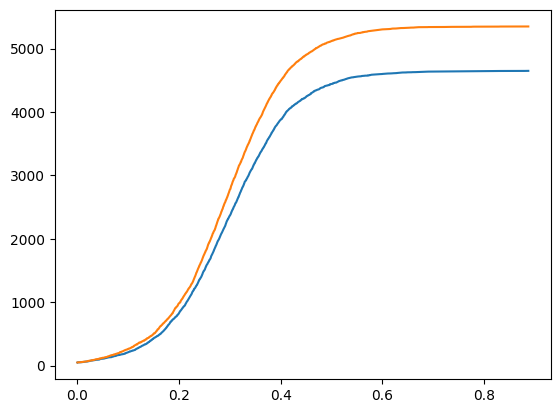

In [27]:
mutationMatrix = np.zeros((2, 2))
mutationMatrix[0, 0] = 1
mutationMatrix[0, 1] = 0
mutationMatrix[1, 0] = 0.25
mutationMatrix[1, 1] = 0.75

infectionMatrix = np.zeros((2, 2))
infectionMatrix[0, 0] = 1
infectionMatrix[0, 1] = 0
infectionMatrix[1, 0] = 0.25
infectionMatrix[1, 1] = 0.75

newInst = Instance([50, 50], 10000, [10, 20], mutationMatrix, infectionMatrix, 10000)

newInst.allPopsReportForDuty()

print("\nTesting findMinPopTimer()\n")
print(newInst.findMinPopTimer())

print("\nTesting updateHostPopulation()\n")
newInst.updateHostPopulation(0)

newInst.allPopsReportForDuty()

print("\nTesting runAlgorithm()\n")
newInst.runAlgorithm()

newInst.allPopsReportForDuty()

print("\nTesting displayResultsAsTimecourses()\n")
newInst.displayResultsAsTimecourses()
